In [1]:
### IMPORTING LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
### LOADING THE DATA
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

### EXPLORATORY DATA ANALYSIS

In [3]:
### FETCHING THE INFORMATION ABOUT EACH COLUMNS IN OUR DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
### SUMMARY STATISTICS
df.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [5]:
### CHECKING FOR NULL VALUES
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
### CHECKING FOR ANY DUPLICATED VALUES
df.duplicated().sum()

0

In [7]:
### CHECKING THE DATATYPE OF THE DATAFRAME
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [8]:
### REMOVING THE LEADING AND TRAILING SPACES FROM ALL COLUMN NAMES
df.columns = df.columns.str.strip()
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [9]:
### CONVERTING THE CATEGORICAL TO NUMERICAL COLUMN
label_encoder = LabelEncoder()


categorical_columns = ['loan_status', 'education', 'self_employed']


for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


df.head()

loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          0              0       9600000   
1        2                 0          1              1       4100000   
2        3                 3          0              0       9100000   
3        4                 3          0              0       8200000   
4        5                 5          1              1       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
0                 17600000             22700000           8000000            0  
1                  2200000              8800000           3300000            1  
2                  4500000             33300000          12800000            1  
3                  3300000             23300000           7900000            1  
4                  8200000             29400000           5000000            1

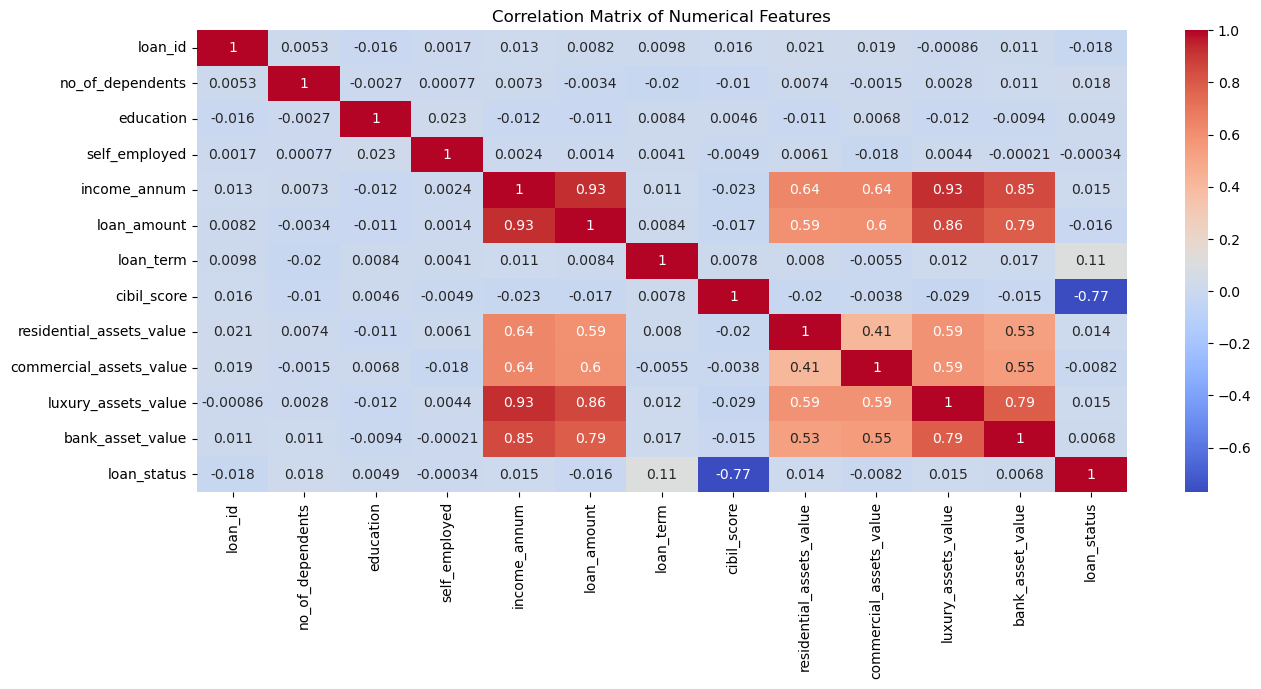

In [10]:
### CORRELATION MATRIX
df_corr = df.corr()

plt.figure(figsize=(15, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


##### LOAN_STATUS IS HAVING POSITIVE CORRELATION WITH LOAN_TERM AND STRONG NEGATIVE CORRELATION WITH CIBIL_SCORE.

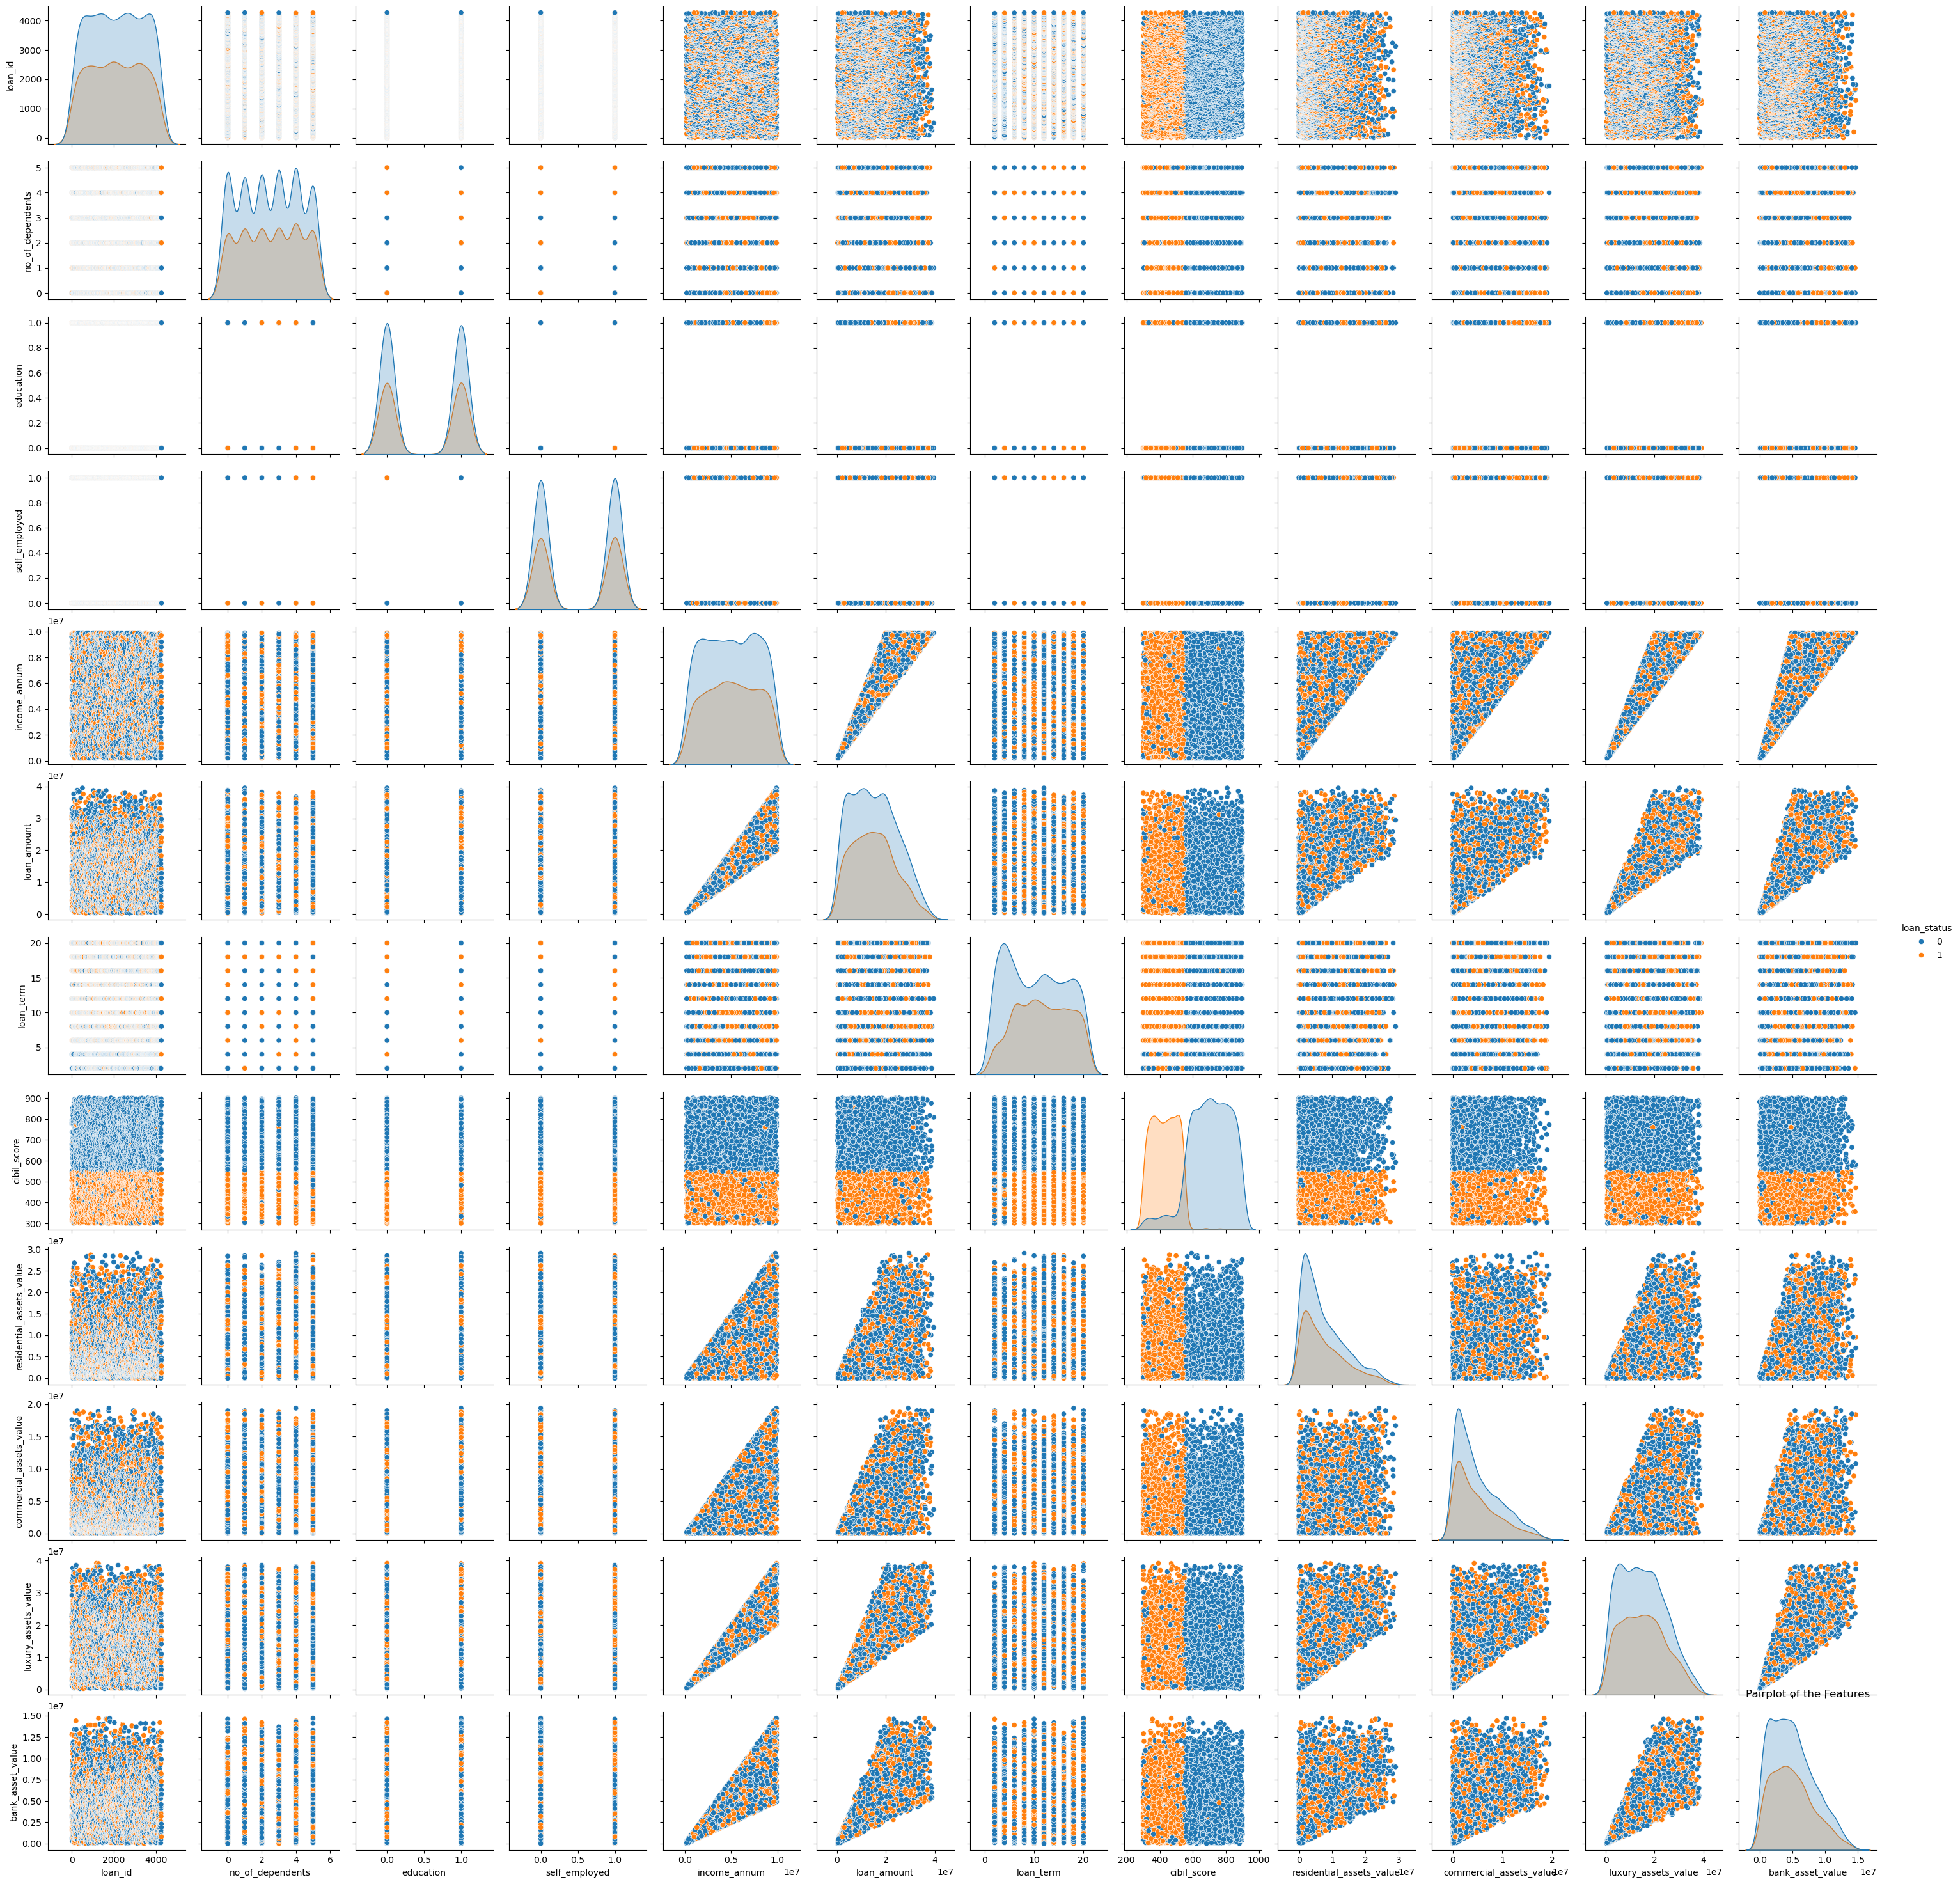

In [11]:
### PAIR-PLOTS
sns.pairplot(df, hue='loan_status')
plt.title('Pairplot of the Features')
plt.show()


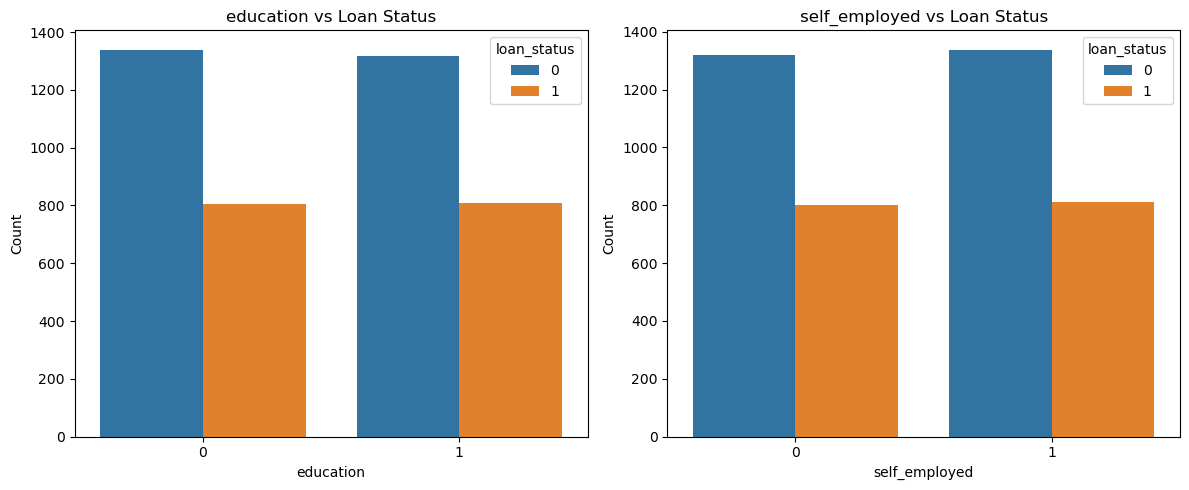

In [12]:
### COUNT_PLOTS FOR THE ENCODED FEATURES
categorical_columns = ['education', 'self_employed']

plt.figure(figsize=(12, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=column, hue='loan_status', data=df)
    plt.title(f'{column} vs Loan Status')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


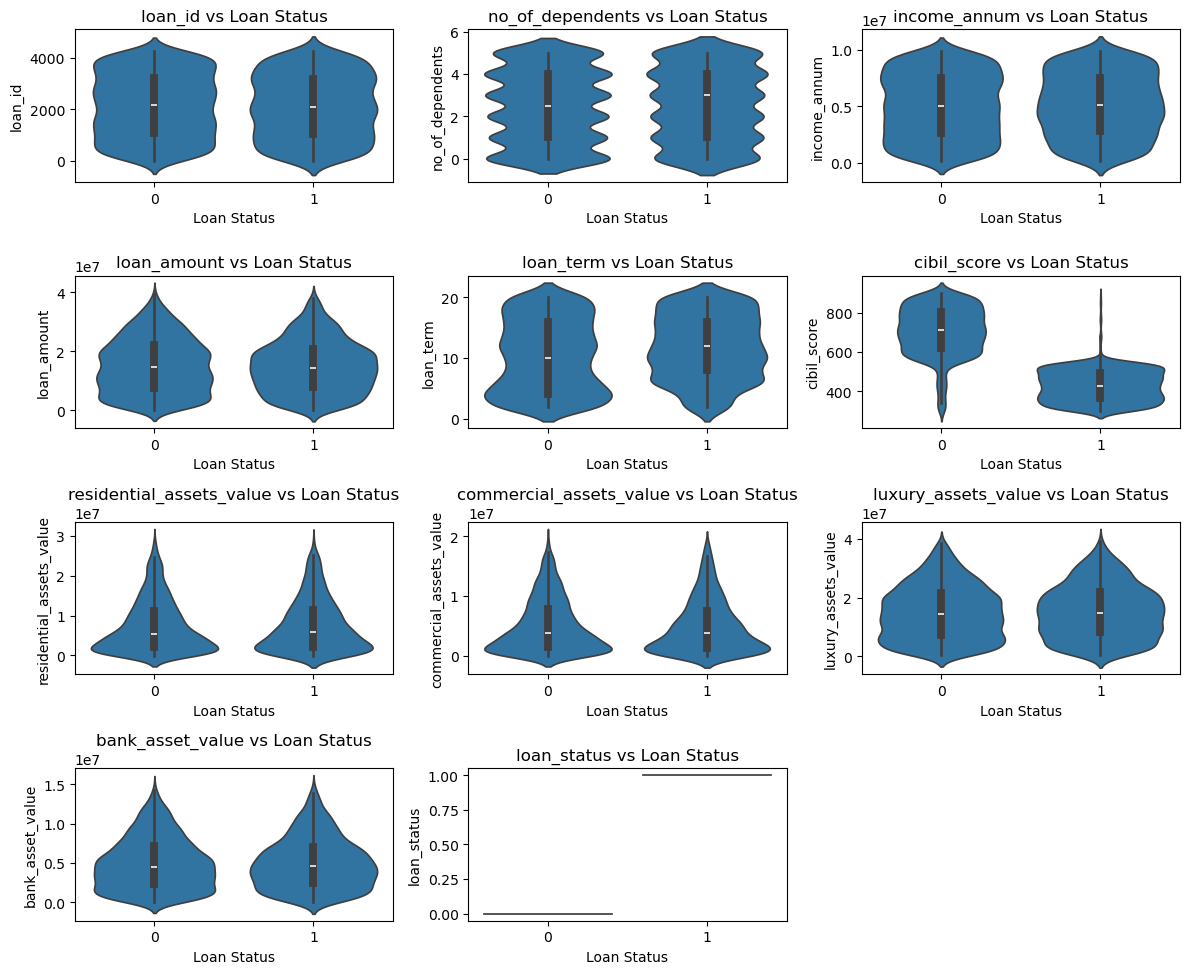

In [13]:
### VIOLIN PLOTS FOR NUMERICAL FEATURES DISTRIBUTION vs LOAN STATUS
numerical_columns = df.drop(['education', 'self_employed'], axis = 1)
plt.figure(figsize=(12, 10))  


for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)  
    sns.violinplot(x='loan_status', y=column, data=df)
    plt.title(f'{column} vs Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(column)

plt.tight_layout()  
plt.show()



### DATA PREPROCESSING

In [14]:
### SPLITTING INTO FEATURES AND TARGET
X = df.drop('loan_status', axis = 1)
y = df['loan_status']

print(X.shape)
print(y.shape)

(4269, 12)
(4269,)


In [15]:
### SPLITTING INTO TRAIN TEST DATASET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [16]:
### FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
### INITIALIZING ALL THE ML CLASSIFIERS
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine (SVM)', SVC()),
    ('K-Nearest Neighbors (KNN)', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

print("Structure of the classifiers list:")
print(classifiers)


Structure of the classifiers list:
[('Logistic Regression', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Support Vector Machine (SVM)', SVC()), ('K-Nearest Neighbors (KNN)', KNeighborsClassifier()), ('Naive Bayes', GaussianNB()), ('AdaBoost', AdaBoostClassifier()), ('Gradient Boosting', GradientBoostingClassifier())]


In [18]:
### PERFORMING CROSS VALIDATION FOR OBTAINING BEST FITTED MODEL
results = {}


for clf_name, clf in classifiers:
    
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')  
    
    
    results[clf_name] = {
        'Mean Accuracy': cv_scores.mean(),
        'Std Accuracy': cv_scores.std(),
        'CV Scores': cv_scores
    }


print("\nResults Dictionary:")
print(results)


Results Dictionary:
{'Logistic Regression': {'Mean Accuracy': 0.9230293048296107, 'Std Accuracy': 0.006213202526013886, 'CV Scores': array([0.91304348, 0.92474916, 0.91973244, 0.93132328, 0.92629816])}, 'Decision Tree': {'Mean Accuracy': 0.9748984610902898, 'Std Accuracy': 0.005504107207469322, 'CV Scores': array([0.96822742, 0.97993311, 0.97993311, 0.9681742 , 0.97822446])}, 'Random Forest': {'Mean Accuracy': 0.978583553217593, 'Std Accuracy': 0.0038599605758009507, 'CV Scores': array([0.97491639, 0.97324415, 0.97993311, 0.98157454, 0.98324958])}, 'Support Vector Machine (SVM)': {'Mean Accuracy': 0.9374234606701288, 'Std Accuracy': 0.01149359960719512, 'CV Scores': array([0.92809365, 0.93143813, 0.93143813, 0.93634841, 0.95979899])}, 'K-Nearest Neighbors (KNN)': {'Mean Accuracy': 0.8832036436362414, 'Std Accuracy': 0.015425691265478606, 'CV Scores': array([0.85618729, 0.89130435, 0.88963211, 0.87772194, 0.90117253])}, 'Naive Bayes': {'Mean Accuracy': 0.9377500658252244, 'Std Accuracy

In [19]:
### PRINTING THE CROSS VALIDATION SCORES FOR EACH MODELS
if results:
    for clf_name, result in results.items():
        print(f"Classifier: {clf_name}")
        print(f"Mean Accuracy: {result['Mean Accuracy']:.4f}")
        print(f"Standard Deviation of Accuracy: {result['Std Accuracy']:.4f}")
        print(f"Cross-Validation Scores: {result['CV Scores']}")
        print("-" * 50)

    ### IDENTIFYING THE BEST MODEL
    best_model = max(results, key=lambda x: results[x]['Mean Accuracy'])
    print(f"The best model based on cross-validation is: {best_model} with Mean Accuracy: {results[best_model]['Mean Accuracy']:.4f}")
else:
    print("Error: No results were recorded for any model.")

Classifier: Logistic Regression
Mean Accuracy: 0.9230
Standard Deviation of Accuracy: 0.0062
Cross-Validation Scores: [0.91304348 0.92474916 0.91973244 0.93132328 0.92629816]
--------------------------------------------------
Classifier: Decision Tree
Mean Accuracy: 0.9749
Standard Deviation of Accuracy: 0.0055
Cross-Validation Scores: [0.96822742 0.97993311 0.97993311 0.9681742  0.97822446]
--------------------------------------------------
Classifier: Random Forest
Mean Accuracy: 0.9786
Standard Deviation of Accuracy: 0.0039
Cross-Validation Scores: [0.97491639 0.97324415 0.97993311 0.98157454 0.98324958]
--------------------------------------------------
Classifier: Support Vector Machine (SVM)
Mean Accuracy: 0.9374
Standard Deviation of Accuracy: 0.0115
Cross-Validation Scores: [0.92809365 0.93143813 0.93143813 0.93634841 0.95979899]
--------------------------------------------------
Classifier: K-Nearest Neighbors (KNN)
Mean Accuracy: 0.8832
Standard Deviation of Accuracy: 0.0154


##### GRADIENT BOOSTING IS THE BEST PERFORMING MODEL, HENCE, IT IS TO BE FITTED, PREDICTED AND EVALUATED.

#### HYPERPARAMETER TUNING WITH RANDOM_SEARCH_CV

In [20]:
param_dist = {
    'n_estimators': np.arange(50, 500, 50),  # Number of boosting stages (trees)
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  # Step size shrinking
    'max_depth': np.arange(3, 15),  # Maximum depth of trees
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples required to split an internal node
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting each tree
    'loss': ['deviance', 'exponential']  # Loss function
}


gb = GradientBoostingClassifier()


random_search = RandomizedSearchCV(gb, param_distributions=param_dist, 
                                   n_iter=100, cv=5, verbose=1, 
                                   random_state=42, n_jobs=-1, scoring='accuracy')


random_search.fit(X_train_scaled, y_train)


print("Best Hyperparameters: ", random_search.best_params_)


best_gb_model = random_search.best_estimator_
best_gb_model


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters:  {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 20, 'max_depth': 13, 'loss': 'exponential', 'learning_rate': 0.2}


GradientBoostingClassifier(learning_rate=0.2, loss='exponential', max_depth=13,
                           min_samples_split=20, n_estimators=50,
                           subsample=0.8)

In [21]:
### BEST MODEL FITTING, PREDICTION AND EVALUATION

best_gb_model.fit(X_train_scaled, y_train)


y_pred = best_gb_model.predict(X_test_scaled)  
 


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       810
           1       0.98      0.97      0.98       471

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281


Accuracy Score: 0.9828259172521467

Confusion Matrix:
[[803   7]
 [ 15 456]]


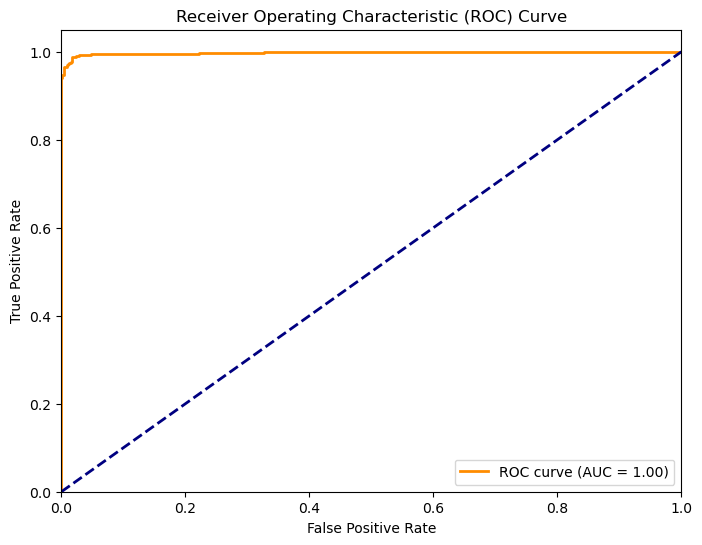


AUC: 1.00


In [22]:
### PLOTTING THE ROC CURVE

y_prob = best_gb_model.predict_proba(X_test_scaled)[:, 1]  ## Probabilities for the positive class


fpr, tpr, thresholds = roc_curve(y_test, y_prob) ## computing the false positive rate, true positive rate and threshold defined


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"\nAUC: {roc_auc:.2f}")